In [1]:
import pandas as pd
import psycopg2 as pg
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [2]:
engine = pg.connect("dbname='test' user='test' host='postgres' port='5432' password='postgres'")
font = font_manager.FontProperties(fname='/home/workspace/data/NotoSansTC-Light.otf')

In [3]:
p_sql = '''
SELECT title.title, content.word, content.count
FROM title
JOIN content
ON title.link_id=content.index
ORDER BY content.count DESC
'''

In [4]:
df = pd.read_sql(p_sql, con=engine)

In [5]:
titles = set(df["title"].values.tolist())

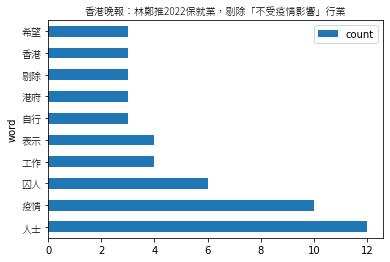

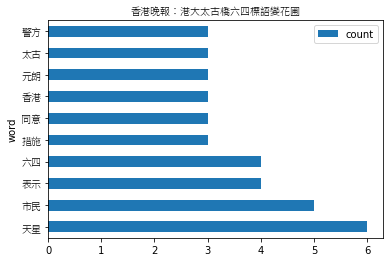

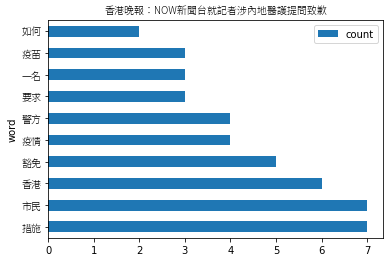

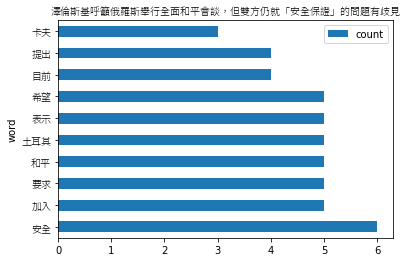

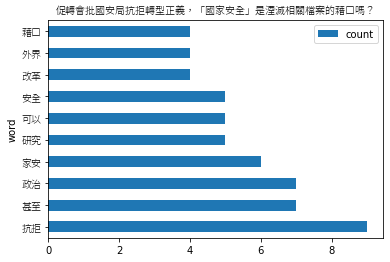

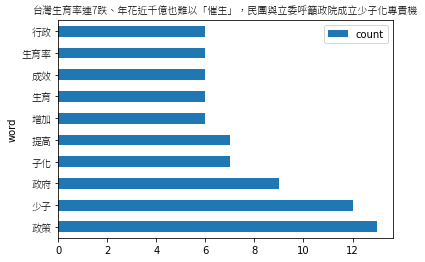

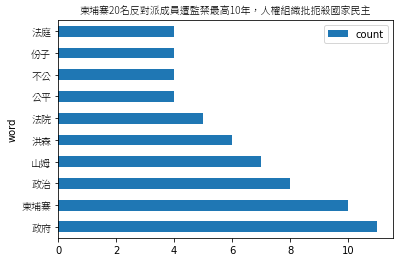

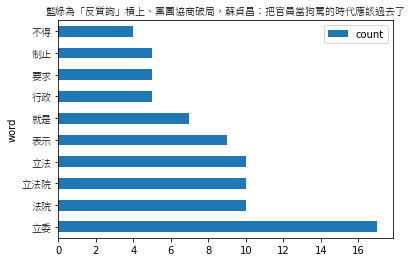

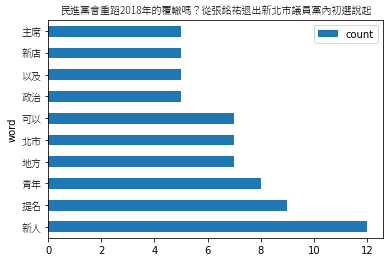

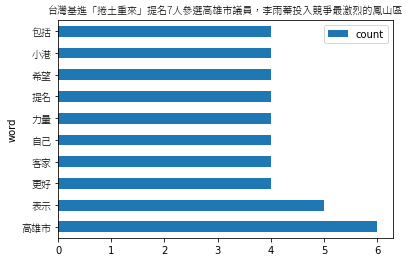

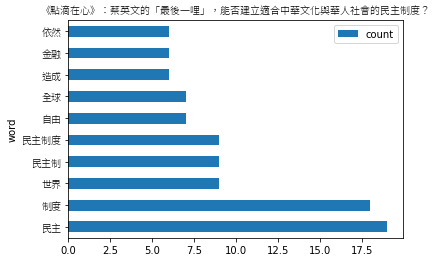

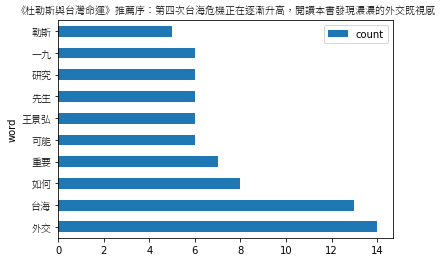

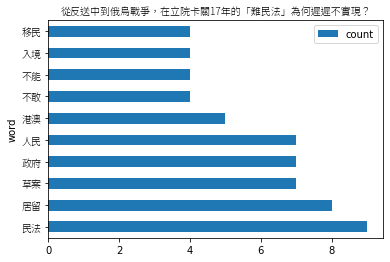

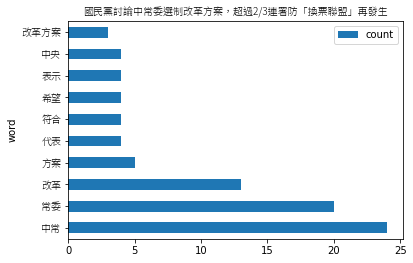

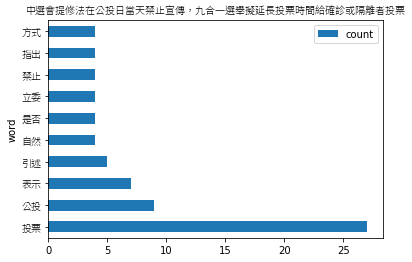

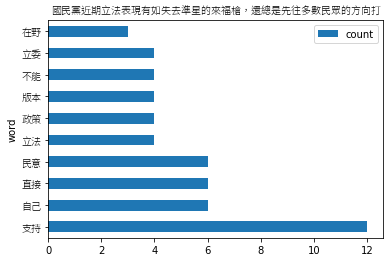

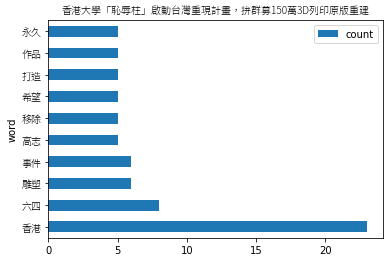

In [6]:
for title in titles:
    word_count_df = df.loc[df["title"] == title][["word", "count"]].head(10)
    ax = word_count_df.plot(x = 'word',y = 'count',kind = 'barh')
    ax.set_yticklabels(word_count_df['word'], fontproperties=font)
    ax.set_title(title, fontproperties=font)
    plt.show()